In [2]:
# читаем библиотеку
import pandas as pd

# читаем csv-файл
covid_data = pd.read_csv('data/covid_data.csv', sep=',')

# читаем csv-файл
vaccinations_data = pd.read_csv('data/country_vaccinations.csv', sep=',')
# оставляем необходимые признаки
vaccinations_data = vaccinations_data[['country','date', 'total_vaccinations',\
    'people_vaccinated','people_vaccinated_per_hundred', \
    'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred', \
    'daily_vaccinations', 'vaccines']]

# сгруппируем данные и просумирем некоторые признаки
covid_data = covid_data.groupby(
    ['date', 'country'],
    as_index=False
)[['confirmed', 'deaths', 'recovered']].sum()

# преобразуем признак date в формат datetime
covid_data['date'] = pd.to_datetime(covid_data['date'])

# создадим новый признак, количество больных на данный момент
covid_data['active'] = covid_data['confirmed'] - covid_data['deaths'] -\
    covid_data['recovered']
    
# находим разницу двух последовательно идущих строк во всей таблице
covid_data = covid_data.sort_values(by=['country', 'date'])
covid_data['daily confirmed'] = covid_data.groupby(by='country')['confirmed']\
    .diff()
covid_data['daily deaths'] = covid_data.groupby(by='country')['deaths']\
    .diff()
covid_data['daily recovered'] = covid_data.groupby(by='country')['recovered']\
    .diff()
    
# предобработаем таблицу vaccination_data
# изменим тип данных
vaccinations_data['date'] = pd.to_datetime(vaccinations_data['date'])

## Задание 3.1

За какой период представлены данные в таблице covid_data? В качестве ответа введите даты в формате datetime (без указания времени).

In [ ]:
# читаем верхнее и нижнее значение
display(covid_data['date'].sort_values())

4056    2020-01-22
4055    2020-01-22
4054    2020-01-22
4061    2020-01-22
4060    2020-01-22
           ...    
45506   2021-05-29
45490   2021-05-29
45433   2021-05-29
45523   2021-05-29
45437   2021-05-29
Name: date, Length: 86785, dtype: datetime64[ns]

## Задание 3.2

За какой период представлены данные в таблице vaccinations_data? В качестве ответа введите даты в формате datetime без указания времени.

In [5]:
# узнаем начало и конец периода наблюдения
display(vaccinations_data['date'].sort_values())

28893   2020-12-02
28894   2020-12-03
21214   2020-12-04
28895   2020-12-04
21215   2020-12-05
           ...    
29639   2021-09-06
6809    2021-09-06
30024   2021-09-06
36494   2021-09-06
41328   2021-09-06
Name: date, Length: 42795, dtype: datetime64[ns]

## * Задание 3.3

С помощью метода merge() объедините таблицы covid_data и vaccinations_data по столбцам date и country.

Тип объединения выставьте так, чтобы в результирующую таблицу попали только наблюдения за период, вычисленный в задании 3.1. То есть в результирующую таблицу должны попасть все записи из таблицы covid_data и из её пересечения с vaccinations_data, но не более. Результат объединения занесите в переменную covid_df.

Сохраните таблицу covid_df — она понадобится нам в следующем юните.
Сколько строк и столбцов в таблице covid_df?

Введите ответ в виде двух чисел через дефис (например, 333-33): первое число — количество строк, второе число — количество столбцов.

In [8]:
# создадим сводную таблицу, которая сгрупированна по двум признакам
covid_df = covid_data.merge(
    vaccinations_data,
    how='left',
    on=['date', 'country']
)
display(covid_df)

,date,country,confirmed,deaths,recovered,active,daily confirmed,daily deaths,daily recovered,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines
0,2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-02-25,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-02-26,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-02-27,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-02-28,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86780,2020-03-12,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86781,2020-03-14,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86782,2020-03-15,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86783,2020-03-16,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## В получившейся в задании 3.3 таблице covid_df создайте признаки death_rate — общий процент смертей среди зафиксированных случаев (летальность) и recover_rate — общий процент случаев выздоровления. Данные характеристики рассчитайте как отношение числа смертей (deaths) и числа выздоровлений (recovered) к числу зафиксированных случаев (confirmed) и умножьте результаты на 100%.

In [ ]:
# создаем признак показывающий общий процент смертей и выздоровлений 
# среди зафиксированных случаев
covid_df['death_rate'] = covid_df['deaths'] / covid_df['confirmed'] * 100
covid_df['recovered_rate'] = covid_df['recovered'] / covid_df['confirmed'] * 100

## Задание 3.4

Какова максимальная летальность в США (United States) за весь период? Ответ округлите до второго знака после запятой.

In [ ]:
# извлекаем инфоримацию о макисмальной летальности в США 
# за весь период наблюдений
display(covid_df[covid_df['country'] == 'United States'].\
    sort_values(by='death_rate', ascending=False).head(3))
# создаю обьект типа Series с информацией только о США
us_series = covid_df[covid_df['country'] == 'United States'].\
    sort_values(by='death_rate', ascending=False, ignore_index=True)
# печатаем ответ и округляем
print(f'Max death rate in United States is: {round(us_series['death_rate'].\
    iloc[0], 2)}')    

,date,country,confirmed,deaths,recovered,active,daily confirmed,daily deaths,daily recovered,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines,death_rate,recovered_rate
82584,2020-03-04,United States,153.0,11.0,8.0,134.0,31.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.189542,5.228758
82656,2020-05-15,United States,1444045.0,87982.0,250747.0,1105316.0,25117.0,1625.0,4333.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.092746,17.364210
82655,2020-05-14,United States,1418928.0,86357.0,246414.0,1086157.0,27013.0,1795.0,2984.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.086073,17.366209


Max death rate in United States is: 7.19


## Задание 3.5

Чему равен средний процент выздоровевших в России (Russia)? Ответ округлите до второго знака после запятой.

In [50]:
print(f'Mean recovered rate in Russia \
is: {round(covid_df.groupby('country')\
    ['recovered_rate'].mean().loc['Russia'], 2)}')

Mean recovered rate in Russia is: 67.06


## Задание 4.5

С помощью какого из перечисленных ниже вариантов кода можно построить столбчатую диаграмму для пяти стран с наименьшим общим числом вакцинаций на последний день рассматриваемого периода (total_vaccinations)?

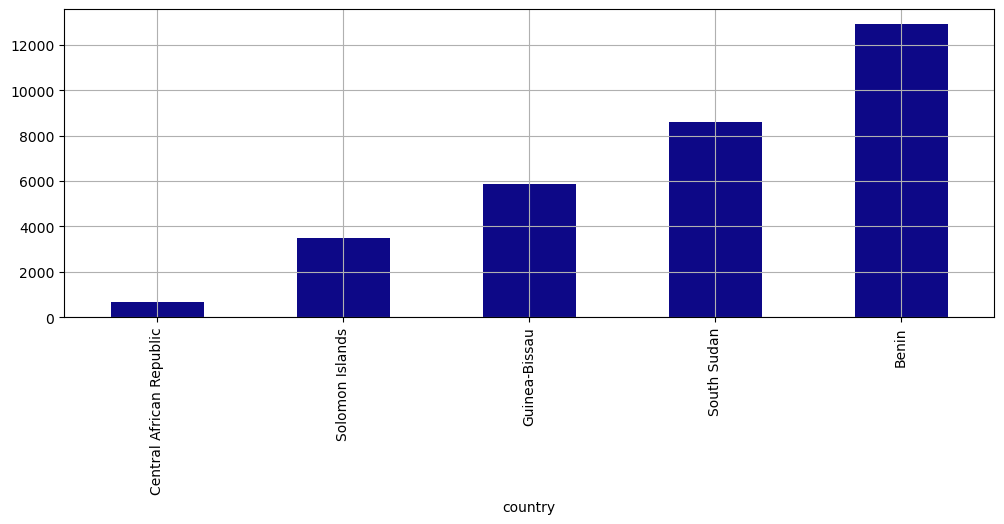

In [52]:
# группирую по странам, 
# нахожу последнее накопительное значение введеных вакцинаций, 
# отбирю пять стран с самым мальеньким значением 
# и отображаю столбчатую диаграмму
grouped_vaccinations = covid_df.groupby(by='country')['total_vaccinations'].\
    last().nsmallest(5).plot(
        kind='bar',
        figsize=(12, 4),
        grid=True,
        colormap='plasma'
);